## Import the libraries

We'll use `pandas` to load and manipulate the data. Other libraries will be imported in the relevant sections.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime
import seaborn as sns

### Holidays File

In [2]:
with open("Car Crashes' Severity Prediction/holidays.xml") as file:
    content = file.read()

content

'<?xml version="1.0" encoding="UTF-8"?>\n<root>\n  <row>\n    <date>2012-01-02</date>\n    <description>New Year Day</description>\n  </row>\n  <row>\n    <date>2012-01-16</date>\n    <description>Martin Luther King Jr. Day</description>\n  </row>\n  <row>\n    <date>2012-02-20</date>\n    <description>Presidents Day (Washingtons Birthday)</description>\n  </row>\n  <row>\n    <date>2012-05-28</date>\n    <description>Memorial Day</description>\n  </row>\n  <row>\n    <date>2012-07-04</date>\n    <description>Independence Day</description>\n  </row>\n  <row>\n    <date>2012-09-03</date>\n    <description>Labor Day</description>\n  </row>\n  <row>\n    <date>2012-10-08</date>\n    <description>Columbus Day</description>\n  </row>\n  <row>\n    <date>2012-11-12</date>\n    <description>Veterans Day</description>\n  </row>\n  <row>\n    <date>2012-11-22</date>\n    <description>Thanksgiving Day</description>\n  </row>\n  <row>\n    <date>2012-12-25</date>\n    <description>Christmas Day</

In [3]:
content_splited = content.split('<date>')[1:]
content_splited = "".join(content_splited).split('</date>')[:-1]
content_splited

['2012-01-02',
 '\n    <description>New Year Day</description>\n  </row>\n  <row>\n    2012-01-16',
 '\n    <description>Martin Luther King Jr. Day</description>\n  </row>\n  <row>\n    2012-02-20',
 '\n    <description>Presidents Day (Washingtons Birthday)</description>\n  </row>\n  <row>\n    2012-05-28',
 '\n    <description>Memorial Day</description>\n  </row>\n  <row>\n    2012-07-04',
 '\n    <description>Independence Day</description>\n  </row>\n  <row>\n    2012-09-03',
 '\n    <description>Labor Day</description>\n  </row>\n  <row>\n    2012-10-08',
 '\n    <description>Columbus Day</description>\n  </row>\n  <row>\n    2012-11-12',
 '\n    <description>Veterans Day</description>\n  </row>\n  <row>\n    2012-11-22',
 '\n    <description>Thanksgiving Day</description>\n  </row>\n  <row>\n    2012-12-25',
 '\n    <description>Christmas Day</description>\n  </row>\n  <row>\n    2013-01-01',
 '\n    <description>New Year Day</description>\n  </row>\n  <row>\n    2013-01-21',
 '\n 

In [4]:
final = []
for record in content_splited:
    final.append(record[-10:])

final

['2012-01-02',
 '2012-01-16',
 '2012-02-20',
 '2012-05-28',
 '2012-07-04',
 '2012-09-03',
 '2012-10-08',
 '2012-11-12',
 '2012-11-22',
 '2012-12-25',
 '2013-01-01',
 '2013-01-21',
 '2013-02-18',
 '2013-05-27',
 '2013-07-04',
 '2013-09-02',
 '2013-10-14',
 '2013-11-11',
 '2013-11-28',
 '2013-12-25',
 '2014-01-01',
 '2014-01-20',
 '2014-02-17',
 '2014-05-26',
 '2014-07-04',
 '2014-09-01',
 '2014-10-13',
 '2014-11-11',
 '2014-11-27',
 '2014-12-25',
 '2015-01-01',
 '2015-01-19',
 '2015-02-16',
 '2015-05-25',
 '2015-07-03',
 '2015-09-07',
 '2015-10-12',
 '2015-11-11',
 '2015-11-26',
 '2015-12-25',
 '2016-01-01',
 '2016-01-18',
 '2016-02-15',
 '2016-05-30',
 '2016-07-04',
 '2016-09-05',
 '2016-10-10',
 '2016-11-11',
 '2016-11-24',
 '2016-12-25',
 '2017-01-02',
 '2017-01-16',
 '2017-02-20',
 '2017-05-29',
 '2017-07-04',
 '2017-09-04',
 '2017-10-09',
 '2017-11-10',
 '2017-11-23',
 '2017-12-25',
 '2018-01-01',
 '2018-01-15',
 '2018-02-19',
 '2018-05-28',
 '2018-07-04',
 '2018-09-03',
 '2018-10-

In [5]:
holidays_df = pd.DataFrame({'Holiday' : final})
holidays_df

,Holiday
0,2012-01-02
1,2012-01-16
2,2012-02-20
3,2012-05-28
4,2012-07-04
...,...
85,2020-09-07
86,2020-10-12
87,2020-11-11
88,2020-11-26


In [6]:
holidays_df['Year'] = holidays_df['Holiday'].str.split('-').str[0]
holidays_df['Month'] = holidays_df['Holiday'].str.split('-').str[1]
holidays_df['Day'] = holidays_df['Holiday'].str.split('-').str[2]

holidays_df

,Holiday,Year,Month,Day
0,2012-01-02,2012,01,02
1,2012-01-16,2012,01,16
2,2012-02-20,2012,02,20
3,2012-05-28,2012,05,28
4,2012-07-04,2012,07,04
...,...,...,...,...
85,2020-09-07,2020,09,07
86,2020-10-12,2020,10,12
87,2020-11-11,2020,11,11
88,2020-11-26,2020,11,26


In [7]:
holidays_df['Month'] = holidays_df['Month'].astype(int).astype(str)
holidays_df['Day'] = holidays_df['Day'].astype(int).astype(str)

holidays_df

,Holiday,Year,Month,Day
0,2012-01-02,2012,1,2
1,2012-01-16,2012,1,16
2,2012-02-20,2012,2,20
3,2012-05-28,2012,5,28
4,2012-07-04,2012,7,4
...,...,...,...,...
85,2020-09-07,2020,9,7
86,2020-10-12,2020,10,12
87,2020-11-11,2020,11,11
88,2020-11-26,2020,11,26


In [8]:
holidays_df['Date'] = holidays_df['Month'] + str('/') + holidays_df['Day'] + str('/') + holidays_df['Year']
holidays_df

,Holiday,Year,Month,Day,Date
0,2012-01-02,2012,1,2,1/2/2012
1,2012-01-16,2012,1,16,1/16/2012
2,2012-02-20,2012,2,20,2/20/2012
3,2012-05-28,2012,5,28,5/28/2012
4,2012-07-04,2012,7,4,7/4/2012
...,...,...,...,...,...
85,2020-09-07,2020,9,7,9/7/2020
86,2020-10-12,2020,10,12,10/12/2020
87,2020-11-11,2020,11,11,11/11/2020
88,2020-11-26,2020,11,26,11/26/2020


In [9]:
holidays = list(holidays_df['Date'])
print(holidays)

['1/2/2012', '1/16/2012', '2/20/2012', '5/28/2012', '7/4/2012', '9/3/2012', '10/8/2012', '11/12/2012', '11/22/2012', '12/25/2012', '1/1/2013', '1/21/2013', '2/18/2013', '5/27/2013', '7/4/2013', '9/2/2013', '10/14/2013', '11/11/2013', '11/28/2013', '12/25/2013', '1/1/2014', '1/20/2014', '2/17/2014', '5/26/2014', '7/4/2014', '9/1/2014', '10/13/2014', '11/11/2014', '11/27/2014', '12/25/2014', '1/1/2015', '1/19/2015', '2/16/2015', '5/25/2015', '7/3/2015', '9/7/2015', '10/12/2015', '11/11/2015', '11/26/2015', '12/25/2015', '1/1/2016', '1/18/2016', '2/15/2016', '5/30/2016', '7/4/2016', '9/5/2016', '10/10/2016', '11/11/2016', '11/24/2016', '12/25/2016', '1/2/2017', '1/16/2017', '2/20/2017', '5/29/2017', '7/4/2017', '9/4/2017', '10/9/2017', '11/10/2017', '11/23/2017', '12/25/2017', '1/1/2018', '1/15/2018', '2/19/2018', '5/28/2018', '7/4/2018', '9/3/2018', '10/8/2018', '11/12/2018', '11/22/2018', '12/25/2018', '1/1/2019', '1/21/2019', '2/18/2019', '5/27/2019', '7/4/2019', '9/2/2019', '10/14/201

### Weather Data Set Transformation

In [10]:
Weather = pd.read_csv("Car Crashes' Severity Prediction/weather-sfcsv.csv", index_col='Weather_Condition')

In [11]:
Weather

,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
Weather_Condition,,,,,,,,,,,
Fair,2020,27,7,18,64.0,0.00,64.0,70.0,20.0,10.0,No
Partly Cloudy,2017,30,9,17,NaN,NaN,71.1,57.0,9.2,10.0,No
Overcast,2017,27,6,5,NaN,NaN,57.9,87.0,15.0,9.0,No
Clear,2016,7,9,9,NaN,NaN,66.9,73.0,4.6,10.0,No
Fair,2019,19,10,2,52.0,0.00,52.0,89.0,0.0,9.0,No
...,...,...,...,...,...,...,...,...,...,...,...
Clear,2018,23,1,21,NaN,NaN,51.1,80.0,3.5,10.0,No
Cloudy,2019,16,6,7,56.0,0.00,56.0,80.0,9.0,9.0,No
Rain,2017,7,2,4,NaN,0.07,61.0,90.0,32.2,7.0,No


In [12]:
# Description of weather file columns
Weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6901 entries, Fair to Shallow Fog
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6901 non-null   int64  
 1   Day                6901 non-null   int64  
 2   Month              6901 non-null   int64  
 3   Hour               6901 non-null   int64  
 4   Wind_Chill(F)      3292 non-null   float64
 5   Precipitation(in)  3574 non-null   float64
 6   Temperature(F)     6899 non-null   float64
 7   Humidity(%)        6899 non-null   float64
 8   Wind_Speed(mph)    6556 non-null   float64
 9   Visibility(mi)     6900 non-null   float64
 10  Selected           6901 non-null   object 
dtypes: float64(6), int64(4), object(1)
memory usage: 647.0+ KB


In [13]:
# Some statistical information about weather file
Weather.describe()

,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
count,6901.000000,6901.000000,6901.000000,6901.000000,3292.000000,3574.000000,6899.000000,6899.000000,6556.000000,6900.000000
mean,2018.293001,15.624837,6.775250,12.789886,59.762515,0.006444,59.905465,68.570952,10.813164,9.441851
std,1.390524,8.703753,3.567982,5.874155,9.338456,0.028822,7.977860,16.180126,6.406376,1.640513
min,2016.000000,1.000000,1.000000,0.000000,31.100000,0.000000,36.000000,10.000000,0.000000,0.000000
25%,2017.000000,8.000000,4.000000,8.000000,54.000000,0.000000,54.000000,59.000000,5.800000,10.000000
50%,2019.000000,15.000000,7.000000,14.000000,59.000000,0.000000,59.000000,70.000000,10.000000,10.000000
75%,2020.000000,23.000000,10.000000,17.000000,66.000000,0.000000,64.900000,80.000000,15.000000,10.000000
max,2020.000000,31.000000,12.000000,23.000000,98.000000,0.490000,98.100000,100.000000,40.300000,10.000000


In [14]:
# Checking if there is null values in the weather file or not
#Weather['Weather_Condition'].isnull().sum()

### Duplicates

In [15]:
Weather_Duplicates = Weather.copy()

In [16]:
Weather_Duplicates.duplicated(subset = ['Year', 'Day', 'Month', 'Hour']).sum()

929

In [17]:
Duplicates = Weather_Duplicates.duplicated(subset = ['Year', 'Day', 'Month', 'Hour'])

In [18]:
Weather_Duplicates[Duplicates].sort_values(by= ['Year', 'Month', 'Day', 'Hour'], axis =0)

,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
Weather_Condition,,,,,,,,,,,
Mostly Cloudy,2016,23,3,9,NaN,NaN,55.0,64.0,NaN,10.0,No
Partly Cloudy,2016,25,3,15,NaN,NaN,66.0,54.0,17.3,10.0,No
Partly Cloudy,2016,1,4,15,NaN,NaN,61.0,67.0,15.0,10.0,No
Mostly Cloudy,2016,6,4,16,NaN,NaN,84.0,25.0,NaN,10.0,No
Mostly Cloudy,2016,11,4,11,NaN,NaN,61.0,70.0,8.1,10.0,No
...,...,...,...,...,...,...,...,...,...,...,...
Light Rain,2020,30,12,18,54.0,0.0,54.0,75.0,3.0,9.0,No
Cloudy,2020,30,12,20,53.0,0.0,53.0,77.0,5.0,6.0,No
Fair,2020,31,12,4,51.0,0.0,51.0,74.0,9.0,9.0,No


In [19]:
#check
wh = Weather_Duplicates[Duplicates]
wh1= wh[wh['Year'] == 2020]
wh2= wh1[wh1['Month'] == 5]
wh2[wh2['Day'] ==17]

,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
Weather_Condition,,,,,,,,,,,
Partly Cloudy / Windy,2020,17,5,13,70.0,0.00,70.0,53.0,24.0,10.0,No
Rain,2020,17,5,7,62.0,0.04,62.0,90.0,12.0,1.0,No
Mostly Cloudy / Windy,2020,17,5,13,74.0,0.00,74.0,46.0,21.0,10.0,No


### Dropping duplicates

In [20]:
Weather_No_Duplicates = Weather_Duplicates.drop_duplicates(subset = ['Year', 'Day', 'Month', 'Hour'], inplace = False)

In [21]:
Weather_No_Duplicates.duplicated(subset = ['Year', 'Day', 'Month', 'Hour']).sum()

0

In [22]:
Data_no_Duplicates_copy = Weather_No_Duplicates.copy()

### As we saw a lot of missing values exist in the data file, So we need to impute all of them by:
#### 1) we will group the data file by "Weather_Condition" column
#### 2) we will calculate the median of each column in the data file, to impute the missing records with these values

In [23]:
Weather_No_Duplicates.reset_index(inplace = True)

In [24]:
# Checking if there is missing values in the "Weather_Condition" column

Weather_No_Duplicates[Weather_No_Duplicates["Weather_Condition"].isnull()]

,Weather_Condition,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
1692,NaN,2017,13,8,2,NaN,NaN,NaN,NaN,NaN,NaN,No


In [25]:
# Remove rows with missing values in 'Weather_Condition' column
Weather_No_Duplicates.dropna(axis=0, subset=['Weather_Condition'], inplace=True)

<ipython-input-25-6e64cc9ecdfb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weather_No_Duplicates.dropna(axis=0, subset=['Weather_Condition'], inplace=True)


In [26]:
# Double checking if there is missing values in the "Weather_Condition" column

Weather_No_Duplicates[Weather_No_Duplicates["Weather_Condition"].isnull()]

,Weather_Condition,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected


### Grouping by 'Weather_Condition' column and calculating median

In [27]:
# Calculating the median of each column in the data
Weather_Median = Weather_No_Duplicates.groupby(['Weather_Condition']).median()

In [28]:
Weather_Median

,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
Weather_Condition,,,,,,,,,,
Clear,2017.0,17.0,7.0,12.0,41.15,NaN,59.0,67.0,8.10,10.0
Cloudy,2019.0,15.0,5.0,10.0,58.00,0.00,58.0,77.0,8.00,10.0
Cloudy / Windy,2019.0,16.0,12.0,12.0,56.00,0.00,56.0,77.0,22.00,10.0
Fair,2019.0,17.0,9.0,14.0,61.00,0.00,61.0,65.0,8.00,10.0
Fair / Windy,2020.0,16.0,7.0,16.0,64.00,0.00,64.0,58.0,22.00,10.0
Fog,2019.0,8.0,11.0,8.0,52.00,0.00,52.0,93.0,3.00,1.0
Fog / Windy,2020.0,1.0,2.0,17.0,52.00,0.00,52.0,100.0,22.00,1.0
Haze,2018.0,15.0,11.0,12.0,57.00,0.00,57.9,74.0,6.00,5.0
Heavy Rain,2019.0,14.0,11.0,12.0,52.50,0.12,55.0,86.0,13.25,3.0


In [29]:
# Checking if there is null values or nit
Weather_Median.isnull().sum()

Year                 0
Day                  0
Month                0
Hour                 0
Wind_Chill(F)        4
Precipitation(in)    3
Temperature(F)       0
Humidity(%)          0
Wind_Speed(mph)      0
Visibility(mi)       0
dtype: int64

### Exploring the missing records in the "Weather_Median" data frame

In [30]:
# exploring the records of the "Squalls" category
Weather_No_Duplicates[Weather_No_Duplicates["Weather_Condition"] == "Squalls"]

,Weather_Condition,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
4856,Squalls,2017,31,3,13,NaN,NaN,66.9,33.0,19.6,10.0,No


In [31]:
# exploring the records of the "Light Thunderstorms and Rain" category

Weather_No_Duplicates[Weather_No_Duplicates["Weather_Condition"] == "Light Thunderstorms and Rain"]

,Weather_Condition,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
5025,Light Thunderstorms and Rain,2017,20,1,4,NaN,0.46,48.0,80.0,15.0,3.0,No


In [32]:
# exploring the records of the "Light Drizzle" category

Weather_No_Duplicates[Weather_No_Duplicates["Weather_Condition"] == "Light Drizzle"]

,Weather_Condition,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
3150,Light Drizzle,2018,10,1,14,NaN,0.0,53.1,100.0,5.8,4.0,No
3243,Light Drizzle,2018,10,1,13,NaN,0.0,52.0,100.0,6.9,2.0,No
3264,Light Drizzle,2016,10,4,6,NaN,NaN,57.0,83.0,9.2,7.0,No
3707,Light Drizzle,2016,9,6,8,NaN,0.0,59.0,75.0,12.7,10.0,No
4070,Light Drizzle,2017,27,6,8,NaN,0.0,60.1,90.0,13.8,7.0,No


In [33]:
# exploring the records of the "Clear" category

Weather_No_Duplicates[Weather_No_Duplicates["Weather_Condition"] == "Clear"]

,Weather_Condition,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
3,Clear,2016,7,9,9,NaN,NaN,66.9,73.0,4.6,10.0,No
21,Clear,2019,18,2,10,NaN,NaN,52.0,40.0,12.7,10.0,Yes
38,Clear,2017,22,11,0,NaN,NaN,55.9,97.0,NaN,10.0,No
48,Clear,2017,21,12,13,NaN,NaN,55.0,37.0,4.6,10.0,No
63,Clear,2018,10,2,22,NaN,NaN,59.0,22.0,9.2,10.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
5919,Clear,2018,25,10,20,NaN,NaN,57.9,81.0,15.0,10.0,No
5937,Clear,2016,29,11,22,44.8,NaN,46.0,73.0,3.5,10.0,No
5959,Clear,2016,28,3,3,NaN,NaN,50.0,68.0,21.9,10.0,No
5966,Clear,2018,14,10,20,NaN,NaN,57.9,81.0,15.0,10.0,No


### Imputing the missing values in Weather_Median data frame

In [34]:
# Make a copy of Weather_Median data frame
Weather_Median_copy = Weather_Median.copy()

In [35]:
# Split both 'Wind_Chill(F)' & 'Precipitation(in)' in different DF
Wind_Chill = Weather_Median_copy['Wind_Chill(F)']
Precipitation = Weather_Median_copy['Precipitation(in)']

In [36]:
(Wind_Chill)

Weather_Condition
Clear                           41.15
Cloudy                          58.00
Cloudy / Windy                  56.00
Fair                            61.00
Fair / Windy                    64.00
Fog                             52.00
Fog / Windy                     52.00
Haze                            57.00
Heavy Rain                      52.50
Light Drizzle                     NaN
Light Rain                      54.50
Light Rain / Windy              56.00
Light Thunderstorms and Rain      NaN
Mist                            51.00
Mostly Cloudy                   58.00
Mostly Cloudy / Windy           65.00
Overcast                        41.00
Partly Cloudy                   60.00
Partly Cloudy / Windy           65.00
Patches of Fog                    NaN
Rain                            50.00
Rain / Windy                    56.50
Scattered Clouds                41.25
Shallow Fog                     51.00
Smoke                           68.00
Squalls                         

In [37]:
print(Precipitation)

Weather_Condition
Clear                            NaN
Cloudy                          0.00
Cloudy / Windy                  0.00
Fair                            0.00
Fair / Windy                    0.00
Fog                             0.00
Fog / Windy                     0.00
Haze                            0.00
Heavy Rain                      0.12
Light Drizzle                   0.00
Light Rain                      0.02
Light Rain / Windy              0.01
Light Thunderstorms and Rain    0.46
Mist                            0.00
Mostly Cloudy                   0.00
Mostly Cloudy / Windy           0.00
Overcast                        0.00
Partly Cloudy                   0.00
Partly Cloudy / Windy           0.00
Patches of Fog                   NaN
Rain                            0.08
Rain / Windy                    0.01
Scattered Clouds                0.00
Shallow Fog                     0.00
Smoke                           0.00
Squalls                          NaN
Name: Precipitation(

In [38]:
Wind_Chill.dropna(axis =0)

Weather_Condition
Clear                    41.15
Cloudy                   58.00
Cloudy / Windy           56.00
Fair                     61.00
Fair / Windy             64.00
Fog                      52.00
Fog / Windy              52.00
Haze                     57.00
Heavy Rain               52.50
Light Rain               54.50
Light Rain / Windy       56.00
Mist                     51.00
Mostly Cloudy            58.00
Mostly Cloudy / Windy    65.00
Overcast                 41.00
Partly Cloudy            60.00
Partly Cloudy / Windy    65.00
Rain                     50.00
Rain / Windy             56.50
Scattered Clouds         41.25
Shallow Fog              51.00
Smoke                    68.00
Name: Wind_Chill(F), dtype: float64

In [39]:
Precipitation.dropna(axis = 0)

Weather_Condition
Cloudy                          0.00
Cloudy / Windy                  0.00
Fair                            0.00
Fair / Windy                    0.00
Fog                             0.00
Fog / Windy                     0.00
Haze                            0.00
Heavy Rain                      0.12
Light Drizzle                   0.00
Light Rain                      0.02
Light Rain / Windy              0.01
Light Thunderstorms and Rain    0.46
Mist                            0.00
Mostly Cloudy                   0.00
Mostly Cloudy / Windy           0.00
Overcast                        0.00
Partly Cloudy                   0.00
Partly Cloudy / Windy           0.00
Rain                            0.08
Rain / Windy                    0.01
Scattered Clouds                0.00
Shallow Fog                     0.00
Smoke                           0.00
Name: Precipitation(in), dtype: float64

In [40]:
print(Wind_Chill.median())
print(Precipitation.median())

56.0
0.0


In [41]:
Weather_Median['Wind_Chill(F)'].fillna(Wind_Chill.median(), inplace = True)
Weather_Median['Precipitation(in)'].fillna(Precipitation.median(), inplace = True)

In [42]:
Weather_Median

,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
Weather_Condition,,,,,,,,,,
Clear,2017.0,17.0,7.0,12.0,41.15,0.00,59.0,67.0,8.10,10.0
Cloudy,2019.0,15.0,5.0,10.0,58.00,0.00,58.0,77.0,8.00,10.0
Cloudy / Windy,2019.0,16.0,12.0,12.0,56.00,0.00,56.0,77.0,22.00,10.0
Fair,2019.0,17.0,9.0,14.0,61.00,0.00,61.0,65.0,8.00,10.0
Fair / Windy,2020.0,16.0,7.0,16.0,64.00,0.00,64.0,58.0,22.00,10.0
Fog,2019.0,8.0,11.0,8.0,52.00,0.00,52.0,93.0,3.00,1.0
Fog / Windy,2020.0,1.0,2.0,17.0,52.00,0.00,52.0,100.0,22.00,1.0
Haze,2018.0,15.0,11.0,12.0,57.00,0.00,57.9,74.0,6.00,5.0
Heavy Rain,2019.0,14.0,11.0,12.0,52.50,0.12,55.0,86.0,13.25,3.0


In [43]:
Weather_Median.isnull().sum()

Year                 0
Day                  0
Month                0
Hour                 0
Wind_Chill(F)        0
Precipitation(in)    0
Temperature(F)       0
Humidity(%)          0
Wind_Speed(mph)      0
Visibility(mi)       0
dtype: int64

- Now, there is `no missing values` in the "Weather_Median" data frame, so it's `ready now` to be in use. 

### Weather data (main file) imputation

In [44]:
# converting to dict
Weather_Median_dict = Weather_Median.to_dict()
  
# display
Weather_Median_dict

{'Year': {'Clear': 2017.0,
  'Cloudy': 2019.0,
  'Cloudy / Windy': 2019.0,
  'Fair': 2019.0,
  'Fair / Windy': 2020.0,
  'Fog': 2019.0,
  'Fog / Windy': 2020.0,
  'Haze': 2018.0,
  'Heavy Rain': 2019.0,
  'Light Drizzle': 2017.0,
  'Light Rain': 2018.0,
  'Light Rain / Windy': 2019.5,
  'Light Thunderstorms and Rain': 2017.0,
  'Mist': 2019.0,
  'Mostly Cloudy': 2018.0,
  'Mostly Cloudy / Windy': 2020.0,
  'Overcast': 2017.0,
  'Partly Cloudy': 2018.0,
  'Partly Cloudy / Windy': 2020.0,
  'Patches of Fog': 2018.0,
  'Rain': 2018.0,
  'Rain / Windy': 2019.5,
  'Scattered Clouds': 2017.0,
  'Shallow Fog': 2019.0,
  'Smoke': 2020.0,
  'Squalls': 2017.0},
 'Day': {'Clear': 17.0,
  'Cloudy': 15.0,
  'Cloudy / Windy': 16.0,
  'Fair': 17.0,
  'Fair / Windy': 16.0,
  'Fog': 8.0,
  'Fog / Windy': 1.0,
  'Haze': 15.0,
  'Heavy Rain': 14.0,
  'Light Drizzle': 10.0,
  'Light Rain': 14.0,
  'Light Rain / Windy': 12.5,
  'Light Thunderstorms and Rain': 20.0,
  'Mist': 11.0,
  'Mostly Cloudy': 15.0,


In [45]:
# checking null values
Data_no_Duplicates_copy.isnull().sum()

Year                    0
Day                     0
Month                   0
Hour                    0
Wind_Chill(F)        3248
Precipitation(in)    3005
Temperature(F)          2
Humidity(%)             2
Wind_Speed(mph)       309
Visibility(mi)          1
Selected                0
dtype: int64

In [46]:
Weather_Imputed = Data_no_Duplicates_copy.fillna(value=Weather_Median_dict)

In [47]:
Weather_Imputed

,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
Weather_Condition,,,,,,,,,,,
Fair,2020,27,7,18,64.00,0.00,64.0,70.0,20.0,10.0,No
Partly Cloudy,2017,30,9,17,60.00,0.00,71.1,57.0,9.2,10.0,No
Overcast,2017,27,6,5,41.00,0.00,57.9,87.0,15.0,9.0,No
Clear,2016,7,9,9,41.15,0.00,66.9,73.0,4.6,10.0,No
Fair,2019,19,10,2,52.00,0.00,52.0,89.0,0.0,9.0,No
...,...,...,...,...,...,...,...,...,...,...,...
Clear,2018,23,1,21,41.15,0.00,51.1,80.0,3.5,10.0,No
Cloudy,2019,16,6,7,56.00,0.00,56.0,80.0,9.0,9.0,No
Rain,2017,7,2,4,50.00,0.07,61.0,90.0,32.2,7.0,No


In [48]:
# checking null values again
Weather_Imputed.isnull().sum()

Year                 0
Day                  0
Month                0
Hour                 0
Wind_Chill(F)        1
Precipitation(in)    1
Temperature(F)       1
Humidity(%)          1
Wind_Speed(mph)      1
Visibility(mi)       1
Selected             0
dtype: int64

In [49]:
# exploring columns with missing records
Weather_Imputed[Weather_Imputed['Wind_Chill(F)'].isnull()]

,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
Weather_Condition,,,,,,,,,,,
NaN,2017,13,8,2,NaN,NaN,NaN,NaN,NaN,NaN,No


In [50]:
# reset index column to the default indexing
Weather_Imputed.reset_index(inplace = True)

In [51]:
Weather_Imputed

,Weather_Condition,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,Fair,2020,27,7,18,64.00,0.00,64.0,70.0,20.0,10.0,No
1,Partly Cloudy,2017,30,9,17,60.00,0.00,71.1,57.0,9.2,10.0,No
2,Overcast,2017,27,6,5,41.00,0.00,57.9,87.0,15.0,9.0,No
3,Clear,2016,7,9,9,41.15,0.00,66.9,73.0,4.6,10.0,No
4,Fair,2019,19,10,2,52.00,0.00,52.0,89.0,0.0,9.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
5967,Clear,2018,23,1,21,41.15,0.00,51.1,80.0,3.5,10.0,No
5968,Cloudy,2019,16,6,7,56.00,0.00,56.0,80.0,9.0,9.0,No
5969,Rain,2017,7,2,4,50.00,0.07,61.0,90.0,32.2,7.0,No
5970,Mostly Cloudy,2016,22,4,16,58.00,0.00,61.0,67.0,21.9,10.0,No


In [52]:
Weather_Imputed.dropna(axis=0, subset=['Weather_Condition'], inplace=True)

In [53]:
Weather_Imputed.isnull().sum()

Weather_Condition    0
Year                 0
Day                  0
Month                0
Hour                 0
Wind_Chill(F)        0
Precipitation(in)    0
Temperature(F)       0
Humidity(%)          0
Wind_Speed(mph)      0
Visibility(mi)       0
Selected             0
dtype: int64

In [54]:
Weather_Imputed

,Weather_Condition,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,Fair,2020,27,7,18,64.00,0.00,64.0,70.0,20.0,10.0,No
1,Partly Cloudy,2017,30,9,17,60.00,0.00,71.1,57.0,9.2,10.0,No
2,Overcast,2017,27,6,5,41.00,0.00,57.9,87.0,15.0,9.0,No
3,Clear,2016,7,9,9,41.15,0.00,66.9,73.0,4.6,10.0,No
4,Fair,2019,19,10,2,52.00,0.00,52.0,89.0,0.0,9.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
5967,Clear,2018,23,1,21,41.15,0.00,51.1,80.0,3.5,10.0,No
5968,Cloudy,2019,16,6,7,56.00,0.00,56.0,80.0,9.0,9.0,No
5969,Rain,2017,7,2,4,50.00,0.07,61.0,90.0,32.2,7.0,No
5970,Mostly Cloudy,2016,22,4,16,58.00,0.00,61.0,67.0,21.9,10.0,No


In [55]:
Weather_Imputed['Selected'] = pd.factorize(Weather_Imputed['Selected'])[0].reshape(-1, 1)

In [56]:
Weather_Imputed

,Weather_Condition,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,Fair,2020,27,7,18,64.00,0.00,64.0,70.0,20.0,10.0,0
1,Partly Cloudy,2017,30,9,17,60.00,0.00,71.1,57.0,9.2,10.0,0
2,Overcast,2017,27,6,5,41.00,0.00,57.9,87.0,15.0,9.0,0
3,Clear,2016,7,9,9,41.15,0.00,66.9,73.0,4.6,10.0,0
4,Fair,2019,19,10,2,52.00,0.00,52.0,89.0,0.0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5967,Clear,2018,23,1,21,41.15,0.00,51.1,80.0,3.5,10.0,0
5968,Cloudy,2019,16,6,7,56.00,0.00,56.0,80.0,9.0,9.0,0
5969,Rain,2017,7,2,4,50.00,0.07,61.0,90.0,32.2,7.0,0
5970,Mostly Cloudy,2016,22,4,16,58.00,0.00,61.0,67.0,21.9,10.0,0


In [57]:
Weather_Imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5971 entries, 0 to 5971
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weather_Condition  5971 non-null   object 
 1   Year               5971 non-null   int64  
 2   Day                5971 non-null   int64  
 3   Month              5971 non-null   int64  
 4   Hour               5971 non-null   int64  
 5   Wind_Chill(F)      5971 non-null   float64
 6   Precipitation(in)  5971 non-null   float64
 7   Temperature(F)     5971 non-null   float64
 8   Humidity(%)        5971 non-null   float64
 9   Wind_Speed(mph)    5971 non-null   float64
 10  Visibility(mi)     5971 non-null   float64
 11  Selected           5971 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 606.4+ KB


In [58]:
# Creating 'Date & Hour' column to merge the 2 DataFrames through
Weather_Imputed['Date & Hour'] = Weather_Imputed['Month'].astype(str) + str('/') + Weather_Imputed['Day'].astype(str) + str('/') + Weather_Imputed['Year'].astype(str) + str('-') + Weather_Imputed['Hour'].astype(str)
Weather_Imputed.head(5)

,Weather_Condition,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,Date & Hour
0,Fair,2020,27,7,18,64.00,0.0,64.0,70.0,20.0,10.0,0,7/27/2020-18
1,Partly Cloudy,2017,30,9,17,60.00,0.0,71.1,57.0,9.2,10.0,0,9/30/2017-17
2,Overcast,2017,27,6,5,41.00,0.0,57.9,87.0,15.0,9.0,0,6/27/2017-5
3,Clear,2016,7,9,9,41.15,0.0,66.9,73.0,4.6,10.0,0,9/7/2016-9
4,Fair,2019,19,10,2,52.00,0.0,52.0,89.0,0.0,9.0,0,10/19/2019-2


In [59]:
Weather_Imputed_final = Weather_Imputed.copy()
Weather_Imputed_final= Weather_Imputed_final.drop(['Year', 'Day', 'Month', 'Hour'], axis=1)
Weather_Imputed_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5971 entries, 0 to 5971
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weather_Condition  5971 non-null   object 
 1   Wind_Chill(F)      5971 non-null   float64
 2   Precipitation(in)  5971 non-null   float64
 3   Temperature(F)     5971 non-null   float64
 4   Humidity(%)        5971 non-null   float64
 5   Wind_Speed(mph)    5971 non-null   float64
 6   Visibility(mi)     5971 non-null   float64
 7   Selected           5971 non-null   int64  
 8   Date & Hour        5971 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 466.5+ KB


In [60]:
Weather_Imputed_final.head()

,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,Date & Hour
0,Fair,64.00,0.0,64.0,70.0,20.0,10.0,0,7/27/2020-18
1,Partly Cloudy,60.00,0.0,71.1,57.0,9.2,10.0,0,9/30/2017-17
2,Overcast,41.00,0.0,57.9,87.0,15.0,9.0,0,6/27/2017-5
3,Clear,41.15,0.0,66.9,73.0,4.6,10.0,0,9/7/2016-9
4,Fair,52.00,0.0,52.0,89.0,0.0,9.0,0,10/19/2019-2


### EDA

In [61]:
train_df = pd.read_csv("Car Crashes' Severity Prediction/train.csv", index_col='ID')
train_df.head()

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
ID,,,,,,,,,,,,,,,
0,37.762150,-122.405660,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02
1,37.719157,-122.448254,False,0.000,False,False,False,False,False,False,False,False,R,2,2020-05-05 19:23:00
2,37.808498,-122.366852,False,0.000,False,False,False,False,False,False,True,False,R,3,2016-09-16 19:57:16
3,37.785930,-122.391080,False,0.009,False,False,True,False,False,False,False,False,R,1,2020-03-29 19:48:43
4,37.719141,-122.448457,False,0.000,False,False,False,False,False,False,False,False,R,2,2019-10-09 08:47:00


In [62]:
test_df = pd.read_csv("Car Crashes' Severity Prediction/test.csv", index_col='ID')
test_df.head()

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp
ID,,,,,,,,,,,,,,
6407,37.786060,-122.390900,False,0.039,False,False,True,False,False,False,False,False,R,2016-04-04 19:20:31
6408,37.769609,-122.415057,False,0.202,False,False,False,False,False,False,False,False,R,2020-10-28 11:51:00
6409,37.807495,-122.476021,False,0.000,False,False,False,False,False,False,False,False,R,2019-09-09 07:36:45
6410,37.761818,-122.405869,False,0.000,False,False,True,False,False,False,False,False,R,2019-08-06 15:46:25
6411,37.732350,-122.414100,False,0.670,False,False,False,False,False,False,False,False,R,2018-10-17 09:54:58


In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lat           6407 non-null   float64
 1   Lng           6407 non-null   float64
 2   Bump          6407 non-null   bool   
 3   Distance(mi)  6407 non-null   float64
 4   Crossing      6407 non-null   bool   
 5   Give_Way      6407 non-null   bool   
 6   Junction      6407 non-null   bool   
 7   No_Exit       6407 non-null   bool   
 8   Railway       6407 non-null   bool   
 9   Roundabout    6407 non-null   bool   
 10  Stop          6407 non-null   bool   
 11  Amenity       6407 non-null   bool   
 12  Side          6407 non-null   object 
 13  Severity      6407 non-null   int64  
 14  timestamp     6407 non-null   object 
dtypes: bool(9), float64(3), int64(1), object(2)
memory usage: 406.7+ KB


In [64]:
train_df.describe()

,Lat,Lng,Distance(mi),Severity
count,6407.000000,6407.000000,6407.000000,6407.000000
mean,37.765653,-122.405990,0.135189,2.293429
std,0.032555,0.028275,0.396360,0.521225
min,37.609619,-122.510440,0.000000,1.000000
25%,37.737096,-122.412210,0.000000,2.000000
50%,37.768238,-122.404835,0.000000,2.000000
75%,37.787813,-122.392478,0.041000,3.000000
max,37.825626,-122.349734,6.820000,4.000000


In [65]:
train_df['Bump'].value_counts()

False    6407
Name: Bump, dtype: int64

- All records of 'Bump' column has the same value so it will have `no impact` in model prediction, so we will `drop it`.

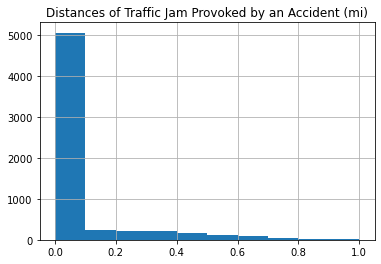

In [66]:
train_df['Distance(mi)'].hist(bins=10, range=[0.0, 1]);
plt.title('Distances of Traffic Jam Provoked by an Accident (mi)');

- Most of accidents cause `traffic jam` of distances in `range 0.1 mi`, about `150 meter`.

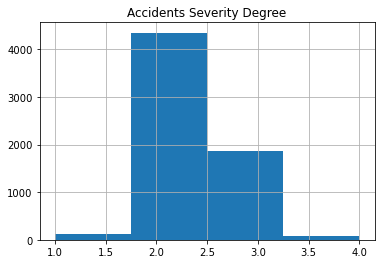

In [67]:
train_df['Severity'].hist(bins=4);
plt.title('Accidents Severity Degree');

In [68]:
train_df['Severity'].value_counts()

2    4346
3    1855
1     129
4      77
Name: Severity, dtype: int64

- Most of accidents happens with `severity degree of 2 or 3`.

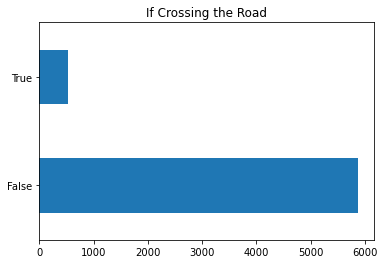

In [69]:
train_df['Crossing'].value_counts().plot(kind='barh');
plt.title('If Crossing the Road');

In [70]:
train_df.groupby(['Crossing'])['Severity'].value_counts()

Crossing  Severity
False     2           3898
          3           1794
          1            120
          4             67
True      2            448
          3             61
          4             10
          1              9
Name: Severity, dtype: int64

- Most of accidents `not caued on crossing` the road, but during driving on it.
- It seems that accidents `number and severity decreases` during crossing.

In [71]:
train_df['Give_Way'].value_counts()

False    6404
True        3
Name: Give_Way, dtype: int64

In [72]:
train_df[train_df['Give_Way'] == True]

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
ID,,,,,,,,,,,,,,,
44,37.800937,-122.447865,False,0.012,True,True,False,False,False,False,False,False,R,2,2020-10-27 17:52:00
995,37.739859,-122.424060,False,0.000,True,True,False,False,True,False,True,False,R,2,2016-11-03 19:45:09
2956,37.807129,-122.473900,False,0.000,True,True,False,False,False,False,True,False,R,2,2019-05-11 09:10:19


- Almost all the records of 'Give_Way' column has the same value, so it's `impact` will be `nothing` to model prediction, `we can drop it`.

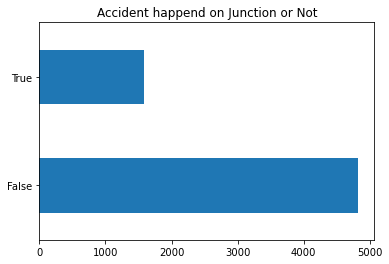

In [73]:
train_df['Junction'].value_counts().plot(kind='barh');
plt.title('Accident happend on Junction or Not');

In [74]:
train_df.groupby(['Junction'])['Severity'].value_counts()

Junction  Severity
False     2           3266
          3           1459
          4             53
          1             50
True      2           1080
          3            396
          1             79
          4             24
Name: Severity, dtype: int64

- Most of accident `doesn't happen on Junctions`, but in entire road.
- It seems that accidents `numbers and severity decreases` on Junctions.

In [75]:
train_df['No_Exit'].value_counts()

False    6406
True        1
Name: No_Exit, dtype: int64

- Almost all the records of 'No_Exit' column has the same value, so it's `impact` will be `nothing` to model prediction, `we can drop it`.

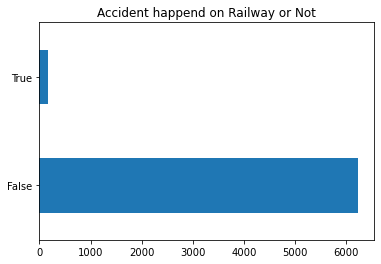

In [76]:
train_df['Railway'].value_counts().plot(kind='barh');
plt.title('Accident happend on Railway or Not');

In [77]:
train_df['Railway'].value_counts()

False    6237
True      170
Name: Railway, dtype: int64

- Most of accident `doesn't happen on Railways`, but inside the town.
- This feature will have `weak impact` on modeling.

In [78]:
train_df['Roundabout'].value_counts()

False    6407
Name: Roundabout, dtype: int64

- All records of 'Roundabout' column has the same value so it will have `no impact` in model prediction, so we will `drop it`.

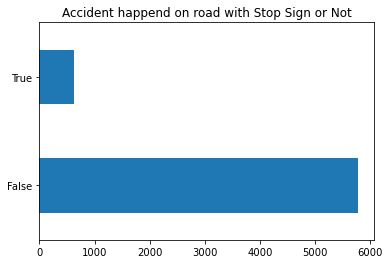

In [79]:
train_df['Stop'].value_counts().plot(kind='barh');
plt.title('Accident happend on road with Stop Sign or Not');

In [80]:
train_df['Stop'].value_counts()

False    5781
True      626
Name: Stop, dtype: int64

- Most of accidents `doesn't happen` on roads with `Stop Sign`.

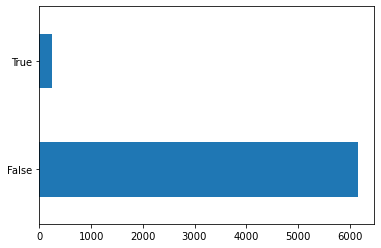

In [81]:
train_df['Amenity'].value_counts().plot(kind='barh');

In [82]:
train_df['Amenity'].value_counts()

False    6169
True      238
Name: Amenity, dtype: int64

- Most of accidents happen with cars with `no Amenity`.
- This feature will have `weak impact` on modeling.

### Train Data Set Transformation

In [83]:
df_train_full_copy = train_df.copy()

In [84]:
df_test_full_copy = test_df.copy()

In [85]:
#Converting the boolean columns into binary columns
for col in train_df.columns: 
    if train_df[col].dtype == 'bool':
        df_train_full_copy[col] = train_df[col].astype(int)

df_train_full_copy.head()

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
ID,,,,,,,,,,,,,,,
0,37.762150,-122.405660,0,0.044,0,0,0,0,0,0,0,1,R,2,2016-03-25 15:13:02
1,37.719157,-122.448254,0,0.000,0,0,0,0,0,0,0,0,R,2,2020-05-05 19:23:00
2,37.808498,-122.366852,0,0.000,0,0,0,0,0,0,1,0,R,3,2016-09-16 19:57:16
3,37.785930,-122.391080,0,0.009,0,0,1,0,0,0,0,0,R,1,2020-03-29 19:48:43
4,37.719141,-122.448457,0,0.000,0,0,0,0,0,0,0,0,R,2,2019-10-09 08:47:00


In [86]:
#Converting the boolean columns into binary columns
for col in test_df.columns: 
    if test_df[col].dtype == 'bool':
        df_test_full_copy[col] = test_df[col].astype(int)

df_test_full_copy.head()

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp
ID,,,,,,,,,,,,,,
6407,37.786060,-122.390900,0,0.039,0,0,1,0,0,0,0,0,R,2016-04-04 19:20:31
6408,37.769609,-122.415057,0,0.202,0,0,0,0,0,0,0,0,R,2020-10-28 11:51:00
6409,37.807495,-122.476021,0,0.000,0,0,0,0,0,0,0,0,R,2019-09-09 07:36:45
6410,37.761818,-122.405869,0,0.000,0,0,1,0,0,0,0,0,R,2019-08-06 15:46:25
6411,37.732350,-122.414100,0,0.670,0,0,0,0,0,0,0,0,R,2018-10-17 09:54:58


In [87]:
df_train_full_copy['Side'] = df_train_full_copy['Side'].map({'L': 1, 'R': 0})
df_train_full_copy.head()

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
ID,,,,,,,,,,,,,,,
0,37.762150,-122.405660,0,0.044,0,0,0,0,0,0,0,1,0,2,2016-03-25 15:13:02
1,37.719157,-122.448254,0,0.000,0,0,0,0,0,0,0,0,0,2,2020-05-05 19:23:00
2,37.808498,-122.366852,0,0.000,0,0,0,0,0,0,1,0,0,3,2016-09-16 19:57:16
3,37.785930,-122.391080,0,0.009,0,0,1,0,0,0,0,0,0,1,2020-03-29 19:48:43
4,37.719141,-122.448457,0,0.000,0,0,0,0,0,0,0,0,0,2,2019-10-09 08:47:00


In [88]:
df_test_full_copy['Side'] = df_test_full_copy['Side'].map({'L': 1, 'R': 0})
df_test_full_copy.head()

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp
ID,,,,,,,,,,,,,,
6407,37.786060,-122.390900,0,0.039,0,0,1,0,0,0,0,0,0,2016-04-04 19:20:31
6408,37.769609,-122.415057,0,0.202,0,0,0,0,0,0,0,0,0,2020-10-28 11:51:00
6409,37.807495,-122.476021,0,0.000,0,0,0,0,0,0,0,0,0,2019-09-09 07:36:45
6410,37.761818,-122.405869,0,0.000,0,0,1,0,0,0,0,0,0,2019-08-06 15:46:25
6411,37.732350,-122.414100,0,0.670,0,0,0,0,0,0,0,0,0,2018-10-17 09:54:58


In [89]:
timestamp = (df_train_full_copy['timestamp'].values).reshape(-1, 1)
date_list = []
time_list = []
for ts in timestamp:
    ts = str(ts)
    ts = ts.replace('[', '')
    ts = ts.replace(']', '')
    ts = ts.replace(' ', '')
    ts = ts.replace("'", "")
    d = ts[:10]
    t = ts[10:]
    date_list.append(d)
    time_list.append(t)
    
    
year_list = []
month_list = []
day_list = []
full_date_list = []
for d in date_list:
    y = d[:4]
    m = d[5:7]
    day = d[8:]
    full_date = str(int(m)) +'/'+ str(int(day)) +'/'+ y
    year_list.append(y)
    month_list.append(m)
    day_list.append(day)
    full_date_list.append(full_date)
    
    
time_stamp = []
for i in range(len(year_list)):
    d = month_list[i]+day_list[i]+year_list[i]

    ts = pd.to_datetime(d, format='%m%d%Y')
    time_stamp.append(ts)
    
    
day_name_list = []
for ts in time_stamp:
    day_name_list.append(ts.day_name())
   

df_train_full_copy['year'] = year_list
df_train_full_copy['month'] = month_list
df_train_full_copy['day'] = day_list
df_train_full_copy['time'] = time_list
df_train_full_copy['day_name'] = day_name_list
df_train_full_copy['full_date'] = full_date_list

df_train_full_copy

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,...,Amenity,Side,Severity,timestamp,year,month,day,time,day_name,full_date
ID,,,,,,,,,,,,,,,,,,,,,
0,37.762150,-122.405660,0,0.044,0,0,0,0,0,0,...,1,0,2,2016-03-25 15:13:02,2016,03,25,15:13:02,Friday,3/25/2016
1,37.719157,-122.448254,0,0.000,0,0,0,0,0,0,...,0,0,2,2020-05-05 19:23:00,2020,05,05,19:23:00,Tuesday,5/5/2020
2,37.808498,-122.366852,0,0.000,0,0,0,0,0,0,...,0,0,3,2016-09-16 19:57:16,2016,09,16,19:57:16,Friday,9/16/2016
3,37.785930,-122.391080,0,0.009,0,0,1,0,0,0,...,0,0,1,2020-03-29 19:48:43,2020,03,29,19:48:43,Sunday,3/29/2020
4,37.719141,-122.448457,0,0.000,0,0,0,0,0,0,...,0,0,2,2019-10-09 08:47:00,2019,10,09,08:47:00,Wednesday,10/9/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,37.740630,-122.407930,0,0.368,0,0,0,0,0,0,...,0,0,3,2017-10-01 18:36:13,2017,10,01,18:36:13,Sunday,10/1/2017
6403,37.752755,-122.402790,0,0.639,0,0,1,0,0,0,...,0,0,2,2018-10-23 07:40:27,2018,10,23,07:40:27,Tuesday,10/23/2018
6404,37.726304,-122.446015,0,0.000,0,0,1,0,0,0,...,0,0,2,2019-10-28 15:45:00,2019,10,28,15:45:00,Monday,10/28/2019


In [90]:
timestamp2 = (df_test_full_copy['timestamp'].values).reshape(-1, 1)
date_list2 = []
time_list2 = []
for ts in timestamp2:
    ts = str(ts)
    ts = ts.replace('[', '')
    ts = ts.replace(']', '')
    ts = ts.replace(' ', '')
    ts = ts.replace("'", "")
    d = ts[:10]
    t = ts[10:]
    date_list2.append(d)
    time_list2.append(t)
    
    
year_list2 = []
month_list2 = []
day_list2 = []
full_date_list2 = []
for d in date_list2:
    y = d[:4]
    m = d[5:7]
    day = d[8:]
    full_date = str(int(m)) +'/'+ str(int(day)) +'/'+ y
    year_list2.append(y)
    month_list2.append(m)
    day_list2.append(day)
    full_date_list2.append(full_date)
    
    
time_stamp2 = []
for i in range(len(year_list2)):
    d = month_list2[i]+day_list2[i]+year_list2[i]

    ts = pd.to_datetime(d, format='%m%d%Y')
    time_stamp2.append(ts)
    
    
day_name_list2 = []
for ts in time_stamp2:
    day_name_list2.append(ts.day_name())
   

df_test_full_copy['year'] = year_list2
df_test_full_copy['month'] = month_list2
df_test_full_copy['day'] = day_list2
df_test_full_copy['time'] = time_list2
df_test_full_copy['day_name'] = day_name_list2
df_test_full_copy['full_date'] = full_date_list2

df_test_full_copy

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp,year,month,day,time,day_name,full_date
ID,,,,,,,,,,,,,,,,,,,,
6407,37.786060,-122.390900,0,0.039,0,0,1,0,0,0,0,0,0,2016-04-04 19:20:31,2016,04,04,19:20:31,Monday,4/4/2016
6408,37.769609,-122.415057,0,0.202,0,0,0,0,0,0,0,0,0,2020-10-28 11:51:00,2020,10,28,11:51:00,Wednesday,10/28/2020
6409,37.807495,-122.476021,0,0.000,0,0,0,0,0,0,0,0,0,2019-09-09 07:36:45,2019,09,09,07:36:45,Monday,9/9/2019
6410,37.761818,-122.405869,0,0.000,0,0,1,0,0,0,0,0,0,2019-08-06 15:46:25,2019,08,06,15:46:25,Tuesday,8/6/2019
6411,37.732350,-122.414100,0,0.670,0,0,0,0,0,0,0,0,0,2018-10-17 09:54:58,2018,10,17,09:54:58,Wednesday,10/17/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,37.812973,-122.362335,0,4.460,0,0,0,0,0,0,0,0,0,2020-06-26 22:32:22,2020,06,26,22:32:22,Friday,6/26/2020
8004,37.761818,-122.405861,0,0.010,0,0,1,0,0,0,0,0,0,2016-12-03 07:16:30,2016,12,03,07:16:30,Saturday,12/3/2016
8005,37.732260,-122.431970,0,0.431,0,0,1,0,0,0,0,0,0,2017-02-20 06:32:44,2017,02,20,06:32:44,Monday,2/20/2017


In [91]:
df_train_full_copy['Hour'] = df_train_full_copy['time'].str[:2]
df_train_full_copy = df_train_full_copy.drop('time', axis=1)
df_train_full_copy

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,...,Amenity,Side,Severity,timestamp,year,month,day,day_name,full_date,Hour
ID,,,,,,,,,,,,,,,,,,,,,
0,37.762150,-122.405660,0,0.044,0,0,0,0,0,0,...,1,0,2,2016-03-25 15:13:02,2016,03,25,Friday,3/25/2016,15
1,37.719157,-122.448254,0,0.000,0,0,0,0,0,0,...,0,0,2,2020-05-05 19:23:00,2020,05,05,Tuesday,5/5/2020,19
2,37.808498,-122.366852,0,0.000,0,0,0,0,0,0,...,0,0,3,2016-09-16 19:57:16,2016,09,16,Friday,9/16/2016,19
3,37.785930,-122.391080,0,0.009,0,0,1,0,0,0,...,0,0,1,2020-03-29 19:48:43,2020,03,29,Sunday,3/29/2020,19
4,37.719141,-122.448457,0,0.000,0,0,0,0,0,0,...,0,0,2,2019-10-09 08:47:00,2019,10,09,Wednesday,10/9/2019,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,37.740630,-122.407930,0,0.368,0,0,0,0,0,0,...,0,0,3,2017-10-01 18:36:13,2017,10,01,Sunday,10/1/2017,18
6403,37.752755,-122.402790,0,0.639,0,0,1,0,0,0,...,0,0,2,2018-10-23 07:40:27,2018,10,23,Tuesday,10/23/2018,07
6404,37.726304,-122.446015,0,0.000,0,0,1,0,0,0,...,0,0,2,2019-10-28 15:45:00,2019,10,28,Monday,10/28/2019,15


In [92]:
df_test_full_copy['Hour'] = df_test_full_copy['time'].str[:2]
df_test_full_copy = df_test_full_copy.drop('time', axis=1)
df_test_full_copy

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp,year,month,day,day_name,full_date,Hour
ID,,,,,,,,,,,,,,,,,,,,
6407,37.786060,-122.390900,0,0.039,0,0,1,0,0,0,0,0,0,2016-04-04 19:20:31,2016,04,04,Monday,4/4/2016,19
6408,37.769609,-122.415057,0,0.202,0,0,0,0,0,0,0,0,0,2020-10-28 11:51:00,2020,10,28,Wednesday,10/28/2020,11
6409,37.807495,-122.476021,0,0.000,0,0,0,0,0,0,0,0,0,2019-09-09 07:36:45,2019,09,09,Monday,9/9/2019,07
6410,37.761818,-122.405869,0,0.000,0,0,1,0,0,0,0,0,0,2019-08-06 15:46:25,2019,08,06,Tuesday,8/6/2019,15
6411,37.732350,-122.414100,0,0.670,0,0,0,0,0,0,0,0,0,2018-10-17 09:54:58,2018,10,17,Wednesday,10/17/2018,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,37.812973,-122.362335,0,4.460,0,0,0,0,0,0,0,0,0,2020-06-26 22:32:22,2020,06,26,Friday,6/26/2020,22
8004,37.761818,-122.405861,0,0.010,0,0,1,0,0,0,0,0,0,2016-12-03 07:16:30,2016,12,03,Saturday,12/3/2016,07
8005,37.732260,-122.431970,0,0.431,0,0,1,0,0,0,0,0,0,2017-02-20 06:32:44,2017,02,20,Monday,2/20/2017,06


In [93]:
# day_of_week_dummy = pd.get_dummies(df_train_full_copy['day_name'])
# df_train_full_copy = df_train_full_copy.join(day_of_week_dummy)
# df_train_full_copy

In [94]:
df_train_full_copy['day_name'] = pd.factorize(df_train_full_copy['day_name'])[0].reshape(-1, 1)

In [95]:
df_train_full_copy.head()

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,...,Amenity,Side,Severity,timestamp,year,month,day,day_name,full_date,Hour
ID,,,,,,,,,,,,,,,,,,,,,
0,37.762150,-122.405660,0,0.044,0,0,0,0,0,0,...,1,0,2,2016-03-25 15:13:02,2016,03,25,0,3/25/2016,15
1,37.719157,-122.448254,0,0.000,0,0,0,0,0,0,...,0,0,2,2020-05-05 19:23:00,2020,05,05,1,5/5/2020,19
2,37.808498,-122.366852,0,0.000,0,0,0,0,0,0,...,0,0,3,2016-09-16 19:57:16,2016,09,16,0,9/16/2016,19
3,37.785930,-122.391080,0,0.009,0,0,1,0,0,0,...,0,0,1,2020-03-29 19:48:43,2020,03,29,2,3/29/2020,19
4,37.719141,-122.448457,0,0.000,0,0,0,0,0,0,...,0,0,2,2019-10-09 08:47:00,2019,10,09,3,10/9/2019,08


In [96]:
# day_of_week_dummy2 = pd.get_dummies(df_test_full_copy['day_name'])
# df_test_full_copy = df_test_full_copy.join(day_of_week_dummy2)
# df_test_full_copy

In [97]:
df_test_full_copy['day_name'] = pd.factorize(df_test_full_copy['day_name'])[0].reshape(-1, 1)
df_test_full_copy.head()

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp,year,month,day,day_name,full_date,Hour
ID,,,,,,,,,,,,,,,,,,,,
6407,37.786060,-122.390900,0,0.039,0,0,1,0,0,0,0,0,0,2016-04-04 19:20:31,2016,04,04,0,4/4/2016,19
6408,37.769609,-122.415057,0,0.202,0,0,0,0,0,0,0,0,0,2020-10-28 11:51:00,2020,10,28,1,10/28/2020,11
6409,37.807495,-122.476021,0,0.000,0,0,0,0,0,0,0,0,0,2019-09-09 07:36:45,2019,09,09,0,9/9/2019,07
6410,37.761818,-122.405869,0,0.000,0,0,1,0,0,0,0,0,0,2019-08-06 15:46:25,2019,08,06,2,8/6/2019,15
6411,37.732350,-122.414100,0,0.670,0,0,0,0,0,0,0,0,0,2018-10-17 09:54:58,2018,10,17,1,10/17/2018,09


In [98]:
df_train_full_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lat           6407 non-null   float64
 1   Lng           6407 non-null   float64
 2   Bump          6407 non-null   int32  
 3   Distance(mi)  6407 non-null   float64
 4   Crossing      6407 non-null   int32  
 5   Give_Way      6407 non-null   int32  
 6   Junction      6407 non-null   int32  
 7   No_Exit       6407 non-null   int32  
 8   Railway       6407 non-null   int32  
 9   Roundabout    6407 non-null   int32  
 10  Stop          6407 non-null   int32  
 11  Amenity       6407 non-null   int32  
 12  Side          6407 non-null   int64  
 13  Severity      6407 non-null   int64  
 14  timestamp     6407 non-null   object 
 15  year          6407 non-null   object 
 16  month         6407 non-null   object 
 17  day           6407 non-null   object 
 18  day_name      6407 non-null 

In [99]:
df_train_full_copy['year'] = df_train_full_copy['year'].astype(int)
df_train_full_copy['month'] = df_train_full_copy['month'].astype(int)
df_train_full_copy['day'] = df_train_full_copy['day'].astype(int)
df_train_full_copy['Hour'] = df_train_full_copy['Hour'].astype(int)

In [100]:
df_test_full_copy['year'] = df_test_full_copy['year'].astype(int)
df_test_full_copy['month'] = df_test_full_copy['month'].astype(int)
df_test_full_copy['day'] = df_test_full_copy['day'].astype(int)
df_test_full_copy['Hour'] = df_test_full_copy['Hour'].astype(int)

In [101]:
df_train_full_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lat           6407 non-null   float64
 1   Lng           6407 non-null   float64
 2   Bump          6407 non-null   int32  
 3   Distance(mi)  6407 non-null   float64
 4   Crossing      6407 non-null   int32  
 5   Give_Way      6407 non-null   int32  
 6   Junction      6407 non-null   int32  
 7   No_Exit       6407 non-null   int32  
 8   Railway       6407 non-null   int32  
 9   Roundabout    6407 non-null   int32  
 10  Stop          6407 non-null   int32  
 11  Amenity       6407 non-null   int32  
 12  Side          6407 non-null   int64  
 13  Severity      6407 non-null   int64  
 14  timestamp     6407 non-null   object 
 15  year          6407 non-null   int32  
 16  month         6407 non-null   int32  
 17  day           6407 non-null   int32  
 18  day_name      6407 non-null 

### Train & Holidays Data Set Manupilations

In [102]:
df_train_full_copy['is_holiday'] = df_train_full_copy['full_date'].apply(lambda x: 1 if x in holidays else 0)
df_train_full_copy['week_end'] = df_train_full_copy['day_name'].apply(lambda x: 1 if x == 'Saturday' or x == 'Sunday' else 0)

# # df_train_full_copy['is_holiday'] = df_train_full_copy['is_holiday'] + df_train_full_copy['week_end']
# df_train_full_copy['is_holiday'] = df_train_full_copy['is_holiday'].map({0:0, 1:1, 2:1})
# df_train_full_copy = df_train_full_copy.drop('week_end', axis=1)

df_train_full_copy['is_holiday'].value_counts()

0    6259
1     148
Name: is_holiday, dtype: int64

In [103]:
df_test_full_copy['is_holiday'] = df_test_full_copy['full_date'].apply(lambda x: 1 if x in holidays else 0)
df_test_full_copy['week_end'] = df_test_full_copy['day_name'].apply(lambda x: 1 if x == 'Saturday' or x == 'Sunday' else 0)

# df_test_full_copy['is_holiday'] = df_test_full_copy['is_holiday'] + df_test_full_copy['week_end']
# df_test_full_copy['is_holiday'] = df_test_full_copy['is_holiday'].map({0:0, 1:1, 2:1})
# df_test_full_copy = df_test_full_copy.drop('week_end', axis=1)

df_test_full_copy['is_holiday'].value_counts()

0    1564
1      37
Name: is_holiday, dtype: int64

In [104]:
df_train_full_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lat           6407 non-null   float64
 1   Lng           6407 non-null   float64
 2   Bump          6407 non-null   int32  
 3   Distance(mi)  6407 non-null   float64
 4   Crossing      6407 non-null   int32  
 5   Give_Way      6407 non-null   int32  
 6   Junction      6407 non-null   int32  
 7   No_Exit       6407 non-null   int32  
 8   Railway       6407 non-null   int32  
 9   Roundabout    6407 non-null   int32  
 10  Stop          6407 non-null   int32  
 11  Amenity       6407 non-null   int32  
 12  Side          6407 non-null   int64  
 13  Severity      6407 non-null   int64  
 14  timestamp     6407 non-null   object 
 15  year          6407 non-null   int32  
 16  month         6407 non-null   int32  
 17  day           6407 non-null   int32  
 18  day_name      6407 non-null 

### Extra EDA

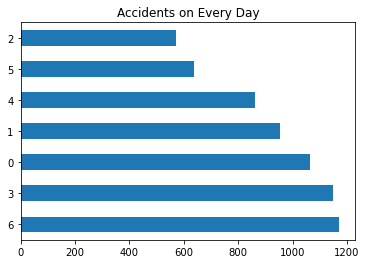

In [105]:
df_train_full_copy['day_name'].value_counts().plot(kind='barh');
plt.title('Accidents on Every Day');

In [106]:
df_train_full_copy.groupby(['day_name'])['Severity'].value_counts()

day_name  Severity
0         2           720
          3           306
          4            20
          1            16
1         2           671
          3           253
          4            15
          1            14
2         2           312
          3           224
          1            32
          4             4
3         2           822
          3           312
          1            13
          4             3
4         2           603
          3           239
          1            12
          4             8
5         2           393
          3           216
          1            19
          4             8
6         2           825
          3           305
          1            23
          4            19
Name: Severity, dtype: int64

- Number of accidents `decreases` in `weekend` and `increases` in the `middle` of the week.

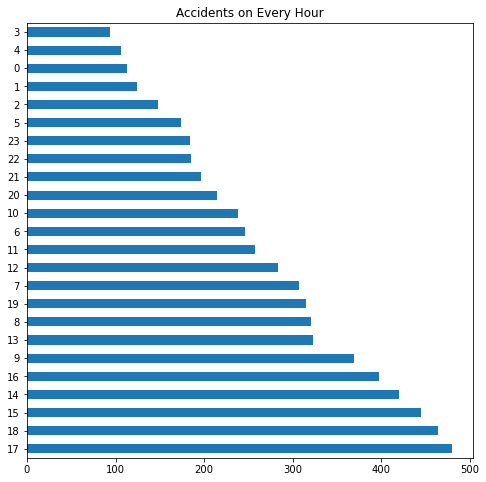

In [107]:
plt.figure(figsize=(8,8))
df_train_full_copy['Hour'].value_counts().plot(kind='barh');
plt.title('Accidents on Every Hour');

- It seems that number of accidents increases between `14 to 18`

In [108]:
df_train_full_copy.columns

Index(['Lat', 'Lng', 'Bump', 'Distance(mi)', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Stop', 'Amenity',
       'Side', 'Severity', 'timestamp', 'year', 'month', 'day', 'day_name',
       'full_date', 'Hour', 'is_holiday', 'week_end'],
      dtype='object')

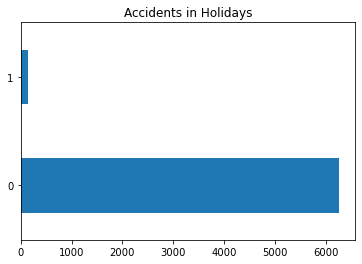

In [109]:
df_train_full_copy['is_holiday'].value_counts().plot(kind='barh');
plt.title('Accidents in Holidays');

In [110]:
df_train_full_copy['is_holiday'].value_counts()/df_train_full_copy.shape[0]

0    0.9769
1    0.0231
Name: is_holiday, dtype: float64

In [111]:
df_train_full_copy.groupby(['is_holiday'])['Severity'].value_counts()

is_holiday  Severity
0           2           4243
            3           1810
            1            129
            4             77
1           2            103
            3             45
Name: Severity, dtype: int64

- It seems that number of accidents `increases in working days 4 times than holidays`.

In [112]:
df_train_full_copy.head()

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,...,Severity,timestamp,year,month,day,day_name,full_date,Hour,is_holiday,week_end
ID,,,,,,,,,,,,,,,,,,,,,
0,37.762150,-122.405660,0,0.044,0,0,0,0,0,0,...,2,2016-03-25 15:13:02,2016,3,25,0,3/25/2016,15,0,0
1,37.719157,-122.448254,0,0.000,0,0,0,0,0,0,...,2,2020-05-05 19:23:00,2020,5,5,1,5/5/2020,19,0,0
2,37.808498,-122.366852,0,0.000,0,0,0,0,0,0,...,3,2016-09-16 19:57:16,2016,9,16,0,9/16/2016,19,0,0
3,37.785930,-122.391080,0,0.009,0,0,1,0,0,0,...,1,2020-03-29 19:48:43,2020,3,29,2,3/29/2020,19,0,0
4,37.719141,-122.448457,0,0.000,0,0,0,0,0,0,...,2,2019-10-09 08:47:00,2019,10,9,3,10/9/2019,8,0,0


In [113]:
df_train_full_copy['Date & Hour'] = df_train_full_copy['full_date'] + str('-') + df_train_full_copy['Hour'].astype(str)

In [114]:
df_test_full_copy['Date & Hour'] = df_test_full_copy['full_date'] + str('-') + df_test_full_copy['Hour'].astype(str)

In [115]:
df_train_full_copy['Date & Hour']

ID
0        3/25/2016-15
1         5/5/2020-19
2        9/16/2016-19
3        3/29/2020-19
4         10/9/2019-8
            ...      
6402     10/1/2017-18
6403     10/23/2018-7
6404    10/28/2019-15
6405      5/4/2019-13
6406     2/28/2020-19
Name: Date & Hour, Length: 6407, dtype: object

'Friday',### Merging DataFrames together

In [116]:
df_train_full_copy.head()

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,...,timestamp,year,month,day,day_name,full_date,Hour,is_holiday,week_end,Date & Hour
ID,,,,,,,,,,,,,,,,,,,,,
0,37.762150,-122.405660,0,0.044,0,0,0,0,0,0,...,2016-03-25 15:13:02,2016,3,25,0,3/25/2016,15,0,0,3/25/2016-15
1,37.719157,-122.448254,0,0.000,0,0,0,0,0,0,...,2020-05-05 19:23:00,2020,5,5,1,5/5/2020,19,0,0,5/5/2020-19
2,37.808498,-122.366852,0,0.000,0,0,0,0,0,0,...,2016-09-16 19:57:16,2016,9,16,0,9/16/2016,19,0,0,9/16/2016-19
3,37.785930,-122.391080,0,0.009,0,0,1,0,0,0,...,2020-03-29 19:48:43,2020,3,29,2,3/29/2020,19,0,0,3/29/2020-19
4,37.719141,-122.448457,0,0.000,0,0,0,0,0,0,...,2019-10-09 08:47:00,2019,10,9,3,10/9/2019,8,0,0,10/9/2019-8


In [117]:
Weather_Imputed_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5971 entries, 0 to 5971
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weather_Condition  5971 non-null   object 
 1   Wind_Chill(F)      5971 non-null   float64
 2   Precipitation(in)  5971 non-null   float64
 3   Temperature(F)     5971 non-null   float64
 4   Humidity(%)        5971 non-null   float64
 5   Wind_Speed(mph)    5971 non-null   float64
 6   Visibility(mi)     5971 non-null   float64
 7   Selected           5971 non-null   int64  
 8   Date & Hour        5971 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 466.5+ KB


In [118]:
full_data = df_train_full_copy.merge(Weather_Imputed_final,how= 'left', on='Date & Hour')

In [119]:
full_data.isnull().sum()

Lat                  0
Lng                  0
Bump                 0
Distance(mi)         0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Stop                 0
Amenity              0
Side                 0
Severity             0
timestamp            0
year                 0
month                0
day                  0
day_name             0
full_date            0
Hour                 0
is_holiday           0
week_end             0
Date & Hour          0
Weather_Condition    1
Wind_Chill(F)        1
Precipitation(in)    1
Temperature(F)       1
Humidity(%)          1
Wind_Speed(mph)      1
Visibility(mi)       1
Selected             1
dtype: int64

In [120]:
full_data_test = df_test_full_copy.merge(Weather_Imputed_final, how='left', on='Date & Hour')

In [121]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lat                6407 non-null   float64
 1   Lng                6407 non-null   float64
 2   Bump               6407 non-null   int32  
 3   Distance(mi)       6407 non-null   float64
 4   Crossing           6407 non-null   int32  
 5   Give_Way           6407 non-null   int32  
 6   Junction           6407 non-null   int32  
 7   No_Exit            6407 non-null   int32  
 8   Railway            6407 non-null   int32  
 9   Roundabout         6407 non-null   int32  
 10  Stop               6407 non-null   int32  
 11  Amenity            6407 non-null   int32  
 12  Side               6407 non-null   int64  
 13  Severity           6407 non-null   int64  
 14  timestamp          6407 non-null   object 
 15  year               6407 non-null   int32  
 16  month              6407 

In [122]:
full_data_clean = full_data.drop(['full_date', 'timestamp', 'Date & Hour'], axis=1)
full_data_clean

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,...,is_holiday,week_end,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,37.762150,-122.405660,0,0.044,0,0,0,0,0,0,...,0,0,Scattered Clouds,41.25,0.0,64.0,58.0,23.0,10.0,0.0
1,37.719157,-122.448254,0,0.000,0,0,0,0,0,0,...,0,0,Mostly Cloudy / Windy,57.00,0.0,57.0,83.0,22.0,10.0,0.0
2,37.808498,-122.366852,0,0.000,0,0,0,0,0,0,...,0,0,Clear,41.15,0.0,62.1,80.0,9.2,10.0,0.0
3,37.785930,-122.391080,0,0.009,0,0,1,0,0,0,...,0,0,Fair,58.00,0.0,58.0,70.0,10.0,10.0,0.0
4,37.719141,-122.448457,0,0.000,0,0,0,0,0,0,...,0,0,Fair,58.00,0.0,58.0,65.0,3.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,37.740630,-122.407930,0,0.368,0,0,0,0,0,0,...,0,0,Scattered Clouds,41.25,0.0,61.0,62.0,17.3,10.0,0.0
6403,37.752755,-122.402790,0,0.639,0,0,1,0,0,0,...,0,0,Mostly Cloudy,58.00,0.0,57.0,72.0,6.9,10.0,0.0
6404,37.726304,-122.446015,0,0.000,0,0,1,0,0,0,...,0,0,Fair,71.00,0.0,71.0,16.0,9.0,10.0,0.0
6405,37.808090,-122.367211,0,0.000,0,0,1,0,0,0,...,0,0,Fair,63.00,0.0,63.0,58.0,13.0,10.0,0.0


In [123]:
full_data_test_clean = full_data_test.drop(['full_date', 'timestamp', 'Date & Hour'], axis=1)
full_data_test_clean

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,...,is_holiday,week_end,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,37.786060,-122.390900,0,0.039,0,0,1,0,0,0,...,0,0,Partly Cloudy,60.00,0.0,63.0,60.0,10.4,10.0,0
1,37.769609,-122.415057,0,0.202,0,0,0,0,0,0,...,0,0,Fair,65.00,0.0,65.0,56.0,5.0,9.0,0
2,37.807495,-122.476021,0,0.000,0,0,0,0,0,0,...,0,0,Mostly Cloudy,58.00,0.0,58.0,90.0,18.0,10.0,0
3,37.761818,-122.405869,0,0.000,0,0,1,0,0,0,...,0,0,Fair,72.00,0.0,72.0,59.0,17.0,10.0,0
4,37.732350,-122.414100,0,0.670,0,0,0,0,0,0,...,0,0,Scattered Clouds,41.25,0.0,57.0,77.0,5.8,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,37.812973,-122.362335,0,4.460,0,0,0,0,0,0,...,0,0,Cloudy,60.00,0.0,60.0,86.0,13.0,10.0,0
1597,37.761818,-122.405861,0,0.010,0,0,1,0,0,0,...,0,0,Partly Cloudy,60.00,0.0,46.0,66.0,12.0,10.0,0
1598,37.732260,-122.431970,0,0.431,0,0,1,0,0,0,...,1,0,Overcast,41.00,0.0,57.9,84.0,9.2,10.0,0
1599,37.786782,-122.390126,0,0.000,1,0,0,0,0,0,...,0,0,Fair,55.00,0.0,55.0,40.0,0.0,10.0,0


In [124]:
full_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lat                6407 non-null   float64
 1   Lng                6407 non-null   float64
 2   Bump               6407 non-null   int32  
 3   Distance(mi)       6407 non-null   float64
 4   Crossing           6407 non-null   int32  
 5   Give_Way           6407 non-null   int32  
 6   Junction           6407 non-null   int32  
 7   No_Exit            6407 non-null   int32  
 8   Railway            6407 non-null   int32  
 9   Roundabout         6407 non-null   int32  
 10  Stop               6407 non-null   int32  
 11  Amenity            6407 non-null   int32  
 12  Side               6407 non-null   int64  
 13  Severity           6407 non-null   int64  
 14  year               6407 non-null   int32  
 15  month              6407 non-null   int32  
 16  day                6407 

In [125]:
full_data_clean['Temperature(F)'].value_counts()

55.0    359
61.0    338
59.0    330
57.0    293
54.0    261
       ... 
75.2      1
96.0      1
80.1      1
98.0      1
36.0      1
Name: Temperature(F), Length: 91, dtype: int64

In [126]:
full_data_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 0 to 1600
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lat                1601 non-null   float64
 1   Lng                1601 non-null   float64
 2   Bump               1601 non-null   int32  
 3   Distance(mi)       1601 non-null   float64
 4   Crossing           1601 non-null   int32  
 5   Give_Way           1601 non-null   int32  
 6   Junction           1601 non-null   int32  
 7   No_Exit            1601 non-null   int32  
 8   Railway            1601 non-null   int32  
 9   Roundabout         1601 non-null   int32  
 10  Stop               1601 non-null   int32  
 11  Amenity            1601 non-null   int32  
 12  Side               1601 non-null   int64  
 13  year               1601 non-null   int32  
 14  month              1601 non-null   int32  
 15  day                1601 non-null   int32  
 16  day_name           1601 

### Extra EDA

In [127]:
full_data_clean['Weather_Condition'].value_counts()

Partly Cloudy                   1404
Mostly Cloudy                   1355
Fair                            1287
Overcast                         500
Clear                            376
Cloudy                           356
Scattered Clouds                 330
Light Rain                       288
Fair / Windy                     144
Haze                              59
Rain                              58
Mostly Cloudy / Windy             58
Partly Cloudy / Windy             57
Fog                               26
Heavy Rain                        26
Shallow Fog                       24
Smoke                             21
Cloudy / Windy                    14
Light Rain / Windy                 5
Mist                               5
Rain / Windy                       5
Light Drizzle                      4
Squalls                            1
Patches of Fog                     1
Light Thunderstorms and Rain       1
Fog / Windy                        1
Name: Weather_Condition, dtype: int64

- Most accidents occurs in `Partly and Mostly Cloudy` weather.
- This feature will be `valuable`.

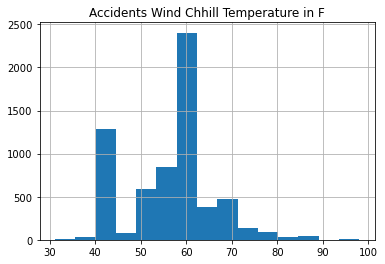

In [128]:
full_data_clean['Wind_Chill(F)'].hist(bins=15);
plt.title('Accidents Wind Chhill Temperature in F');

##### - Most Accedents happens in range `60F degree`.

In [129]:
full_data_clean['Precipitation(in)'].value_counts()

0.00    6028
0.01      84
0.02      72
0.03      34
0.04      29
0.06      25
0.05      18
0.15      18
0.07      18
0.11      16
0.09      14
0.08      11
0.14       9
0.12       7
0.13       3
0.10       3
0.16       3
0.46       3
0.19       2
0.30       1
0.28       1
0.22       1
0.23       1
0.21       1
0.24       1
0.18       1
0.49       1
0.20       1
Name: Precipitation(in), dtype: int64

In [130]:
full_data_clean['Weather_Condition'] = pd.factorize(full_data_clean['Weather_Condition'])[0].reshape(-1,1)
full_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lat                6407 non-null   float64
 1   Lng                6407 non-null   float64
 2   Bump               6407 non-null   int32  
 3   Distance(mi)       6407 non-null   float64
 4   Crossing           6407 non-null   int32  
 5   Give_Way           6407 non-null   int32  
 6   Junction           6407 non-null   int32  
 7   No_Exit            6407 non-null   int32  
 8   Railway            6407 non-null   int32  
 9   Roundabout         6407 non-null   int32  
 10  Stop               6407 non-null   int32  
 11  Amenity            6407 non-null   int32  
 12  Side               6407 non-null   int64  
 13  Severity           6407 non-null   int64  
 14  year               6407 non-null   int32  
 15  month              6407 non-null   int32  
 16  day                6407 

In [131]:
full_data_test_clean['Weather_Condition'] = pd.factorize(full_data_test_clean['Weather_Condition'])[0].reshape(-1,1)
full_data_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 0 to 1600
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lat                1601 non-null   float64
 1   Lng                1601 non-null   float64
 2   Bump               1601 non-null   int32  
 3   Distance(mi)       1601 non-null   float64
 4   Crossing           1601 non-null   int32  
 5   Give_Way           1601 non-null   int32  
 6   Junction           1601 non-null   int32  
 7   No_Exit            1601 non-null   int32  
 8   Railway            1601 non-null   int32  
 9   Roundabout         1601 non-null   int32  
 10  Stop               1601 non-null   int32  
 11  Amenity            1601 non-null   int32  
 12  Side               1601 non-null   int64  
 13  year               1601 non-null   int32  
 14  month              1601 non-null   int32  
 15  day                1601 non-null   int32  
 16  day_name           1601 

In [132]:
full_data_clean.dropna(inplace=True)

In [133]:
full_data_test_clean.dropna(inplace=True)

In [134]:
full_data_clean.isnull().sum()

Lat                  0
Lng                  0
Bump                 0
Distance(mi)         0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Stop                 0
Amenity              0
Side                 0
Severity             0
year                 0
month                0
day                  0
day_name             0
Hour                 0
is_holiday           0
week_end             0
Weather_Condition    0
Wind_Chill(F)        0
Precipitation(in)    0
Temperature(F)       0
Humidity(%)          0
Wind_Speed(mph)      0
Visibility(mi)       0
Selected             0
dtype: int64

In [135]:
# full_data_clean.columns

In [136]:
# full_data_clean.columns

In [137]:
# full_data_clean_2, full_data_test_clean_2 = full_data_clean.align(full_data_test_clean, join='inner', axis=1)

In [138]:
# full_data_clean_2.columns

In [139]:
df_test_full_copy['is_holiday'] = df_test_full_copy['full_date'].apply(lambda x: 1 if x in holidays else 0)


In [140]:
full_data_clean['is_rush'] = full_data_clean['Hour'].apply(lambda x: 1 if x  in [14, 15, 16, 17, 18] else 0)

In [141]:
full_data_test_clean['is_rush'] = full_data_test_clean['Hour'].apply(lambda x: 1 if x  in [14, 15, 16, 17, 18] else 0)

In [142]:
full_data_clean['Severity'].value_counts()

2    4346
3    1854
1     129
4      77
Name: Severity, dtype: int64

In [143]:
full_data_test_clean.columns

Index(['Lat', 'Lng', 'Bump', 'Distance(mi)', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Stop', 'Amenity',
       'Side', 'year', 'month', 'day', 'day_name', 'Hour', 'is_holiday',
       'week_end', 'Weather_Condition', 'Wind_Chill(F)', 'Precipitation(in)',
       'Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)', 'Visibility(mi)',
       'Selected', 'is_rush'],
      dtype='object')

In [144]:
submission_columns = [ 'Lat', 'Lng', 'is_rush',
                       'Side','day_name', 'year', 'month',  'Hour', 'is_holiday',
                       'week_end', 'Weather_Condition', 'Wind_Chill(F)', 'Precipitation(in)',
                       'Visibility(mi)','Distance(mi)']

In [145]:
test_columns = submission_columns.copy()
test_columns.append('Severity')
df = full_data_clean[test_columns]
full_data_clean

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,...,week_end,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,is_rush
0,37.762150,-122.405660,0,0.044,0,0,0,0,0,0,...,0,0,41.25,0.0,64.0,58.0,23.0,10.0,0.0,1
1,37.719157,-122.448254,0,0.000,0,0,0,0,0,0,...,0,1,57.00,0.0,57.0,83.0,22.0,10.0,0.0,0
2,37.808498,-122.366852,0,0.000,0,0,0,0,0,0,...,0,2,41.15,0.0,62.1,80.0,9.2,10.0,0.0,0
3,37.785930,-122.391080,0,0.009,0,0,1,0,0,0,...,0,3,58.00,0.0,58.0,70.0,10.0,10.0,0.0,0
4,37.719141,-122.448457,0,0.000,0,0,0,0,0,0,...,0,3,58.00,0.0,58.0,65.0,3.0,10.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,37.740630,-122.407930,0,0.368,0,0,0,0,0,0,...,0,0,41.25,0.0,61.0,62.0,17.3,10.0,0.0,1
6403,37.752755,-122.402790,0,0.639,0,0,1,0,0,0,...,0,5,58.00,0.0,57.0,72.0,6.9,10.0,0.0,0
6404,37.726304,-122.446015,0,0.000,0,0,1,0,0,0,...,0,3,71.00,0.0,71.0,16.0,9.0,10.0,0.0,1
6405,37.808090,-122.367211,0,0.000,0,0,1,0,0,0,...,0,3,63.00,0.0,63.0,58.0,13.0,10.0,0.0,0


### Predicting 

In [146]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df[['Severity']]) # Try adding `stratify` here

X_train = train_df.drop(columns=['Severity'])
y_train = train_df['Severity']

X_val = val_df.drop(columns=['Severity'])
y_val = val_df['Severity']

In [147]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
classifier = classifier.fit(X_train, y_train)

In [148]:
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.7254290171606864


### Predicting on the Test dataset

In [149]:
X_test = full_data_test_clean.copy()

# You should update/remove the next line once you change the features used for training
X_test = X_test[submission_columns]
y_test_predicted = classifier.predict(X_test)
test_df['Severity'] = y_test_predicted
test_df.head()

y_test_predicted

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [150]:
sub_df = test_df['Severity']

sub_df = pd.DataFrame(sub_df)

In [151]:
sub_df['ID'] = sub_df.index

In [152]:
sub_df[['ID', 'Severity']].to_csv('submission.csv', index=False)